<a href="https://colab.research.google.com/github/Laurahg22/Trabajo-analitica-RH/blob/main/Limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#### Cargar paquetes siempre al inicio
import pandas as pd ### para manejo de datos
import sqlite3 as sql #### para bases de datos sql
import matplotlib as mpl ## gráficos
import matplotlib.pyplot as plt ### gráficos
import seaborn as sns
from pandas.plotting import scatter_matrix  ## para matriz de correlaciones
from sklearn import tree ###para ajustar arboles de decisión
from sklearn.tree import export_text ## para exportar reglas del árbol

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
# Nueva ruta que deseas establecer como directorio de trabajo
nueva_ruta = '/content/drive/MyDrive/Trabajo-analitica-RH (1)'
# Cambiar al nuevo directorio
os.chdir(nueva_ruta)
# Verificar que el cambio se realizó correctamente imprimiendo el nuevo directorio de trabajo
print("Nuevo directorio de trabajo:", os.getcwd())

Nuevo directorio de trabajo: /content/drive/.shortcut-targets-by-id/1Hz9AUoKgQWP8sH4d-fV1egdsUnEE7m_f/Trabajo-analitica-RH


In [11]:
import a_funciones as funciones ### archivo de funciones propias

In [12]:
# Configurar la opción para mostrar todas las columnas completas
pd.set_option('display.max_columns', None)

In [13]:
df=pd.read_csv('/content/drive/MyDrive/Trabajo-analitica-RH/data/data_final.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Trabajo-analitica-RH/data/data_final.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      8820 non-null   int64         
 1   BusinessTravel           8820 non-null   object        
 2   Department               8820 non-null   object        
 3   DistanceFromHome         8820 non-null   int64         
 4   Education                8820 non-null   int64         
 5   EducationField           8820 non-null   object        
 6   EmployeeID               8820 non-null   int64         
 7   Gender                   8820 non-null   object        
 8   JobLevel                 8820 non-null   int64         
 9   JobRole                  8820 non-null   object        
 10  MaritalStatus            8820 non-null   object        
 11  MonthlyIncome            8820 non-null   int64         
 12  NumCompaniesWorked       8820 non-

In [ ]:
# Cambiar el tipo de dato de las variables con fechas
df['InfoDate'] = pd.to_datetime(df['InfoDate'], format='%Y/%m/%d')
df['retirementDate'] = pd.to_datetime(df['retirementDate'], format='%Y/%m/%d')

In [ ]:
# eliminar variable index
df = df.drop(['index'], axis=1)

In [ ]:
# llenar nulos de la variable respuesta
condicion = (df['retirementType'] == 'fired') | (pd.isnull(df['retirementType']))
df.loc[condicion, 'Attrition'] = 'No'

In [ ]:
def imputar_con_moda(df, variables):
    for variable in variables:
        # Calcula la moda de la variable
        moda = df[variable].mode()[0]  # Selecciona el primer valor de la moda en caso de que haya múltiples modas
        # Imputa los valores nulos con la moda
        df[variable].fillna(moda, inplace=True)
        # Imprime información sobre los valores nulos imputados
        nulos_imputados = df[variable].isnull().sum()
    # Devuelve el DataFrame modificado
    return df

In [ ]:
# imputar datos nulos para NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
df = imputar_con_moda(df, ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

In [ ]:
df.isnull().sum()

Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
InfoDate                      0
EnvironmentSatisfaction       0
JobSatisfaction               0
WorkLifeBalance               0
JobInvolvement                0
PerformanceRating             0
Attrition                     0
retirementDate             8170
retirementType             8170
resignationReason          8235
dtype: int64

In [ ]:
# Identificar si hay datos duplicados
display(df[df.duplicated(keep='last')])
display(df[df.duplicated(keep='first')])

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason


Exploración de variables categoricas

In [ ]:
#resumen de las variables categoricas para observar el balanceo de las categoricas
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(df, col, plot=False)

                   BusinessTravel      Ratio
Travel_Rarely                6258  70.952381
Travel_Frequently            1662  18.843537
Non-Travel                    900  10.204082
##########################################
                        Department      Ratio
Research & Development        5766  65.374150
Sales                         2676  30.340136
Human Resources                378   4.285714
##########################################
                  EducationField      Ratio
Life Sciences               3636  41.224490
Medical                     2784  31.564626
Marketing                    954  10.816327
Technical Degree             792   8.979592
Other                        492   5.578231
Human Resources              162   1.836735
##########################################
        Gender  Ratio
Male      5292   60.0
Female    3528   40.0
##########################################
                           JobRole      Ratio
Sales Executive               1956  22.17687

Exploración de variables numericas

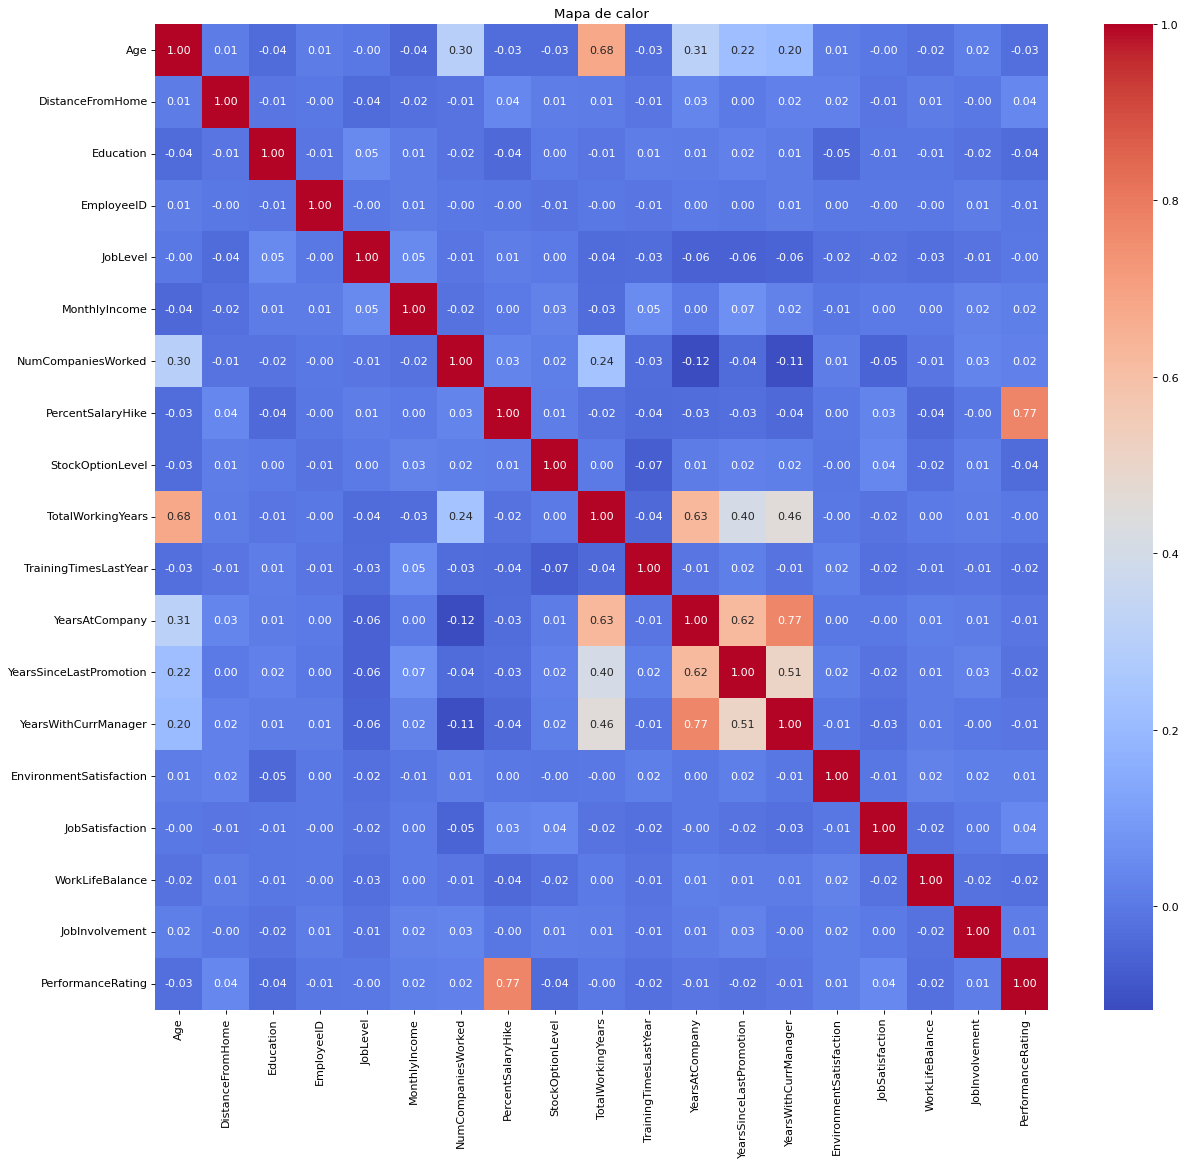

In [ ]:
#Se crea una variable solo con las variables numericas
variables_numericas = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación.
matriz_correlacion = variables_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(18, 16), dpi=80)
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor")
plt.show()

Comentar el mapa de calor

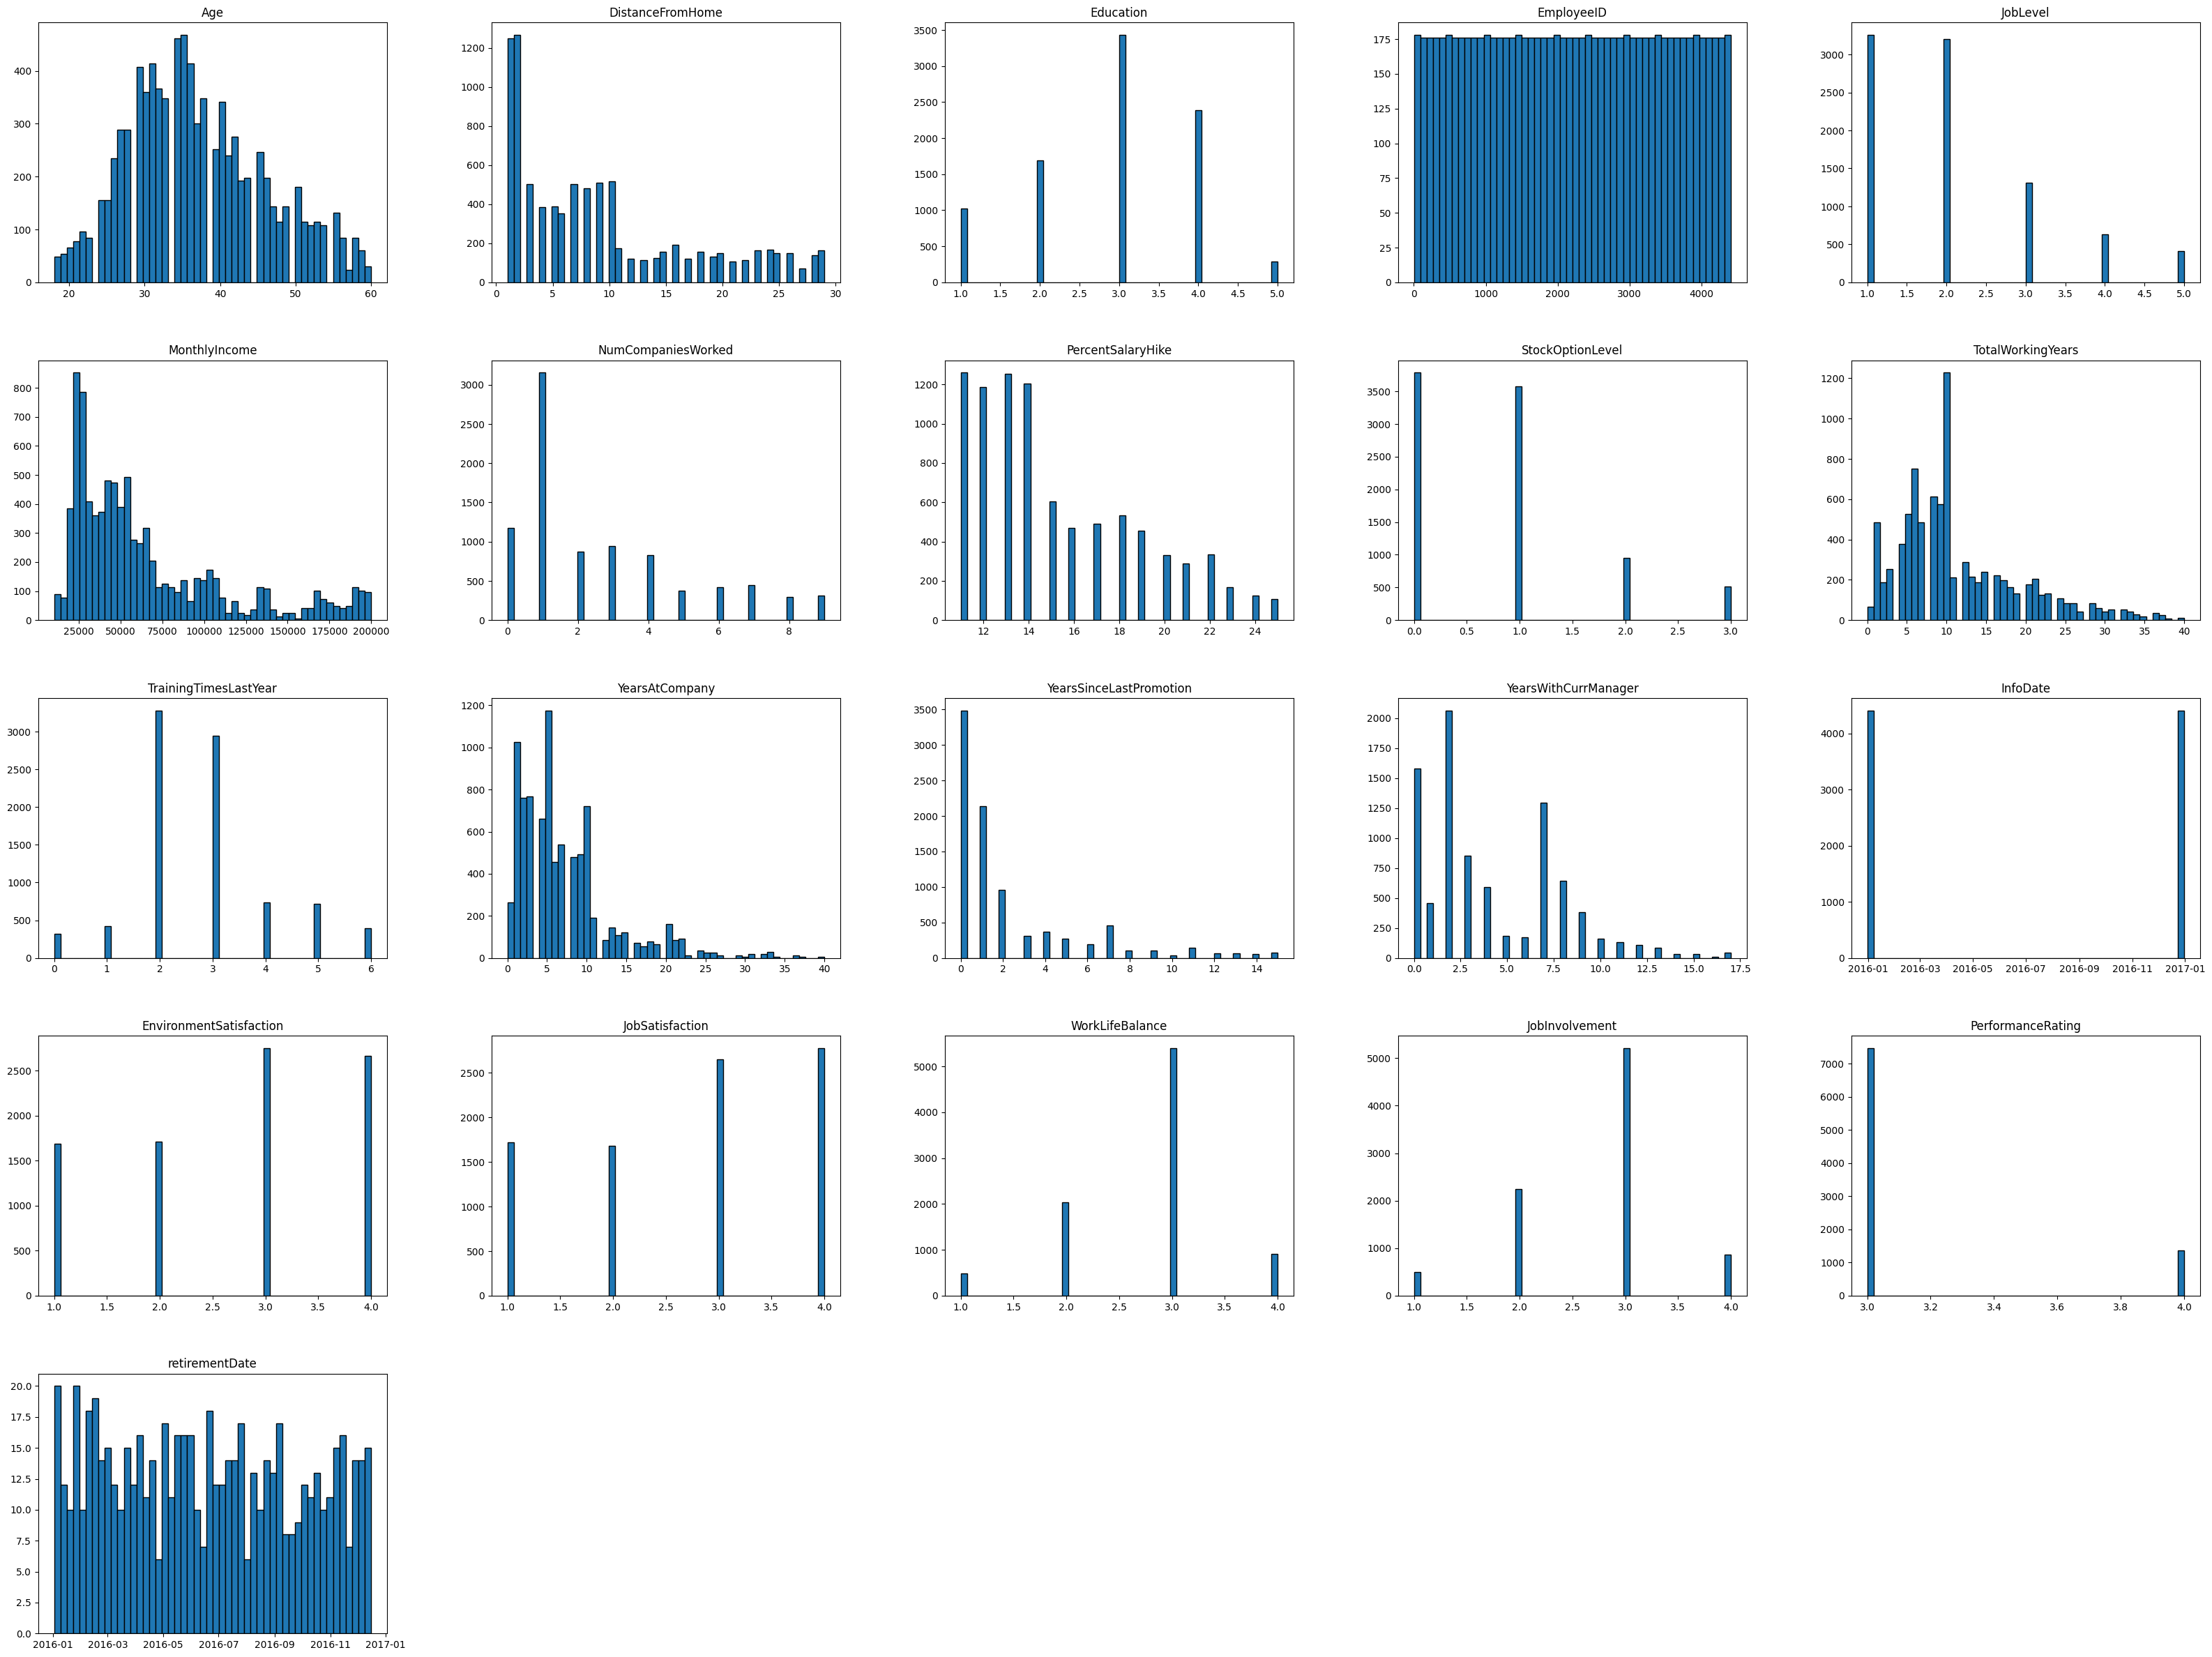

In [ ]:
####explorar variables numéricas con histograma
fig=df.hist(bins=50, figsize=(40,30),grid=False,ec='black')
plt.show()

Exploracion de variable respuesta

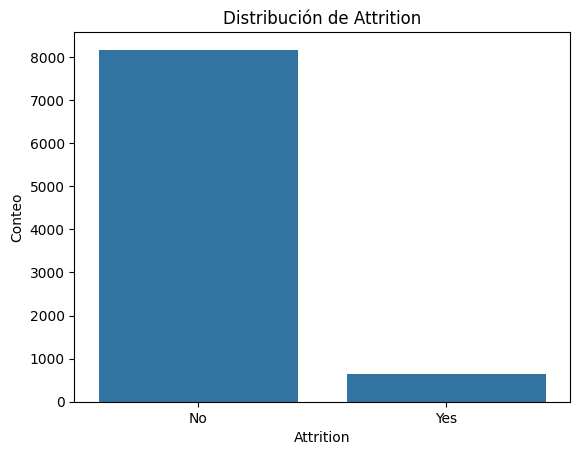

In [ ]:
# Crear un gráfico de barras utilizando Seaborn
sns.countplot(x='Attrition', data=df)  # Crear gráfico
plt.title('Distribución de Attrition')  # Título
plt.xlabel('Attrition')  # Etiqueta del eje x
plt.ylabel('Conteo')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

# Otra parte de la exploración